In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import calendar

In [132]:
online_retail=pd.read_excel('C:/Users/ellen/Downloads/Online Retail.xlsx')

In [133]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data preprocessing

In [134]:
online_retail.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [135]:
online_retail.CustomerID.isnull().sum()
#online_retail['CustomerID'].isna().sum()

135080

In [136]:
online_retail.Description.isnull().sum()

1454

In [137]:
online_retail.notna().sum()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [138]:
online_retail.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [139]:
online_retail['InvoiceDate'] = pd.to_datetime(online_retail['InvoiceDate'])
online_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [150]:
online_retail['Month'] = pd.DatetimeIndex(online_retail['InvoiceDate']).month
online_retail

C:\Users\ellen\AppData\Local\Temp\ipykernel_19204\2608053970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail['Month'] = pd.DatetimeIndex(online_retail['InvoiceDate']).month


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12


In [167]:
month = online_retail.groupby('Month').sum().reset_index()
month

,Month,Quantity,UnitPrice,CustomerID,Total
0,1,388811,129735.010,321904509.0,691364.560
1,2,280860,108169.960,305225091.0,523631.890
2,3,357267,145628.240,412680258.0,717639.360
3,4,302743,115603.731,345952584.0,537808.621
4,5,386259,150417.050,431158808.0,770536.020
5,6,348985,140240.390,416663110.0,761739.900
6,7,397144,143008.521,410703863.0,719221.191
7,8,418543,138453.980,412144474.0,759138.380
8,9,557246,174774.462,610894038.0,1058590.172
9,10,595073,223426.870,755924156.0,1154979.300


In [153]:
#i want to check if there are any returns
online_retail.sort_values(['Country','Quantity']).head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month
142988,548661,POST,POSTAGE,1,2011-04-01 14:28:00,350.00,12415.0,Australia,350.00,4
269589,560491,23232,WRAP VINTAGE LEAF DESIGN,1,2011-07-19 10:51:00,0.42,12415.0,Australia,0.42,7
269590,560491,21503,TOYBOX WRAP,1,2011-07-19 10:51:00,0.42,12415.0,Australia,0.42,7
269591,560491,22546,MINI JIGSAW PURDEY,1,2011-07-19 10:51:00,0.42,12415.0,Australia,0.42,7
269592,560491,22545,MINI JIGSAW BUNNIES,1,2011-07-19 10:51:00,0.42,12415.0,Australia,0.42,7


In [141]:
#another way of checking would be 
online_retail.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [154]:
#remove all negative quantity by multiplying it by the unit price for total transactions

online_retail['Total']= online_retail.Quantity*online_retail.UnitPrice
online_retail['Total'].head(10)


C:\Users\ellen\AppData\Local\Temp\ipykernel_19204\3671054692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail['Total']= online_retail.Quantity*online_retail.UnitPrice


0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
5    15.30
6    25.50
7    11.10
8    11.10
9    54.08
Name: Total, dtype: float64

In [155]:
online_retail=online_retail[~(online_retail['Total']<0)]
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [156]:
#reorder df
OR= online_retail.copy()

In [157]:
OR

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12


In [215]:
OR.sort_values(by=['Country','Total'], ascending= False ).head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month
308304,563947,23236,STORAGE TIN VINTAGE DOILY,24,2011-08-22 10:18:00,2.89,12363.0,Unspecified,69.36,8
308310,563947,23234,BISCUIT TIN VINTAGE CHRISTMAS,24,2011-08-22 10:18:00,2.89,12363.0,Unspecified,69.36,8
184562,552695,22960,JAM MAKING SET WITH JARS,12,2011-05-10 15:31:00,3.75,16320.0,Unspecified,45.00,5
498755,578539,22138,BAKING SET 9 PIECE RETROSPOT,9,2011-11-24 14:55:00,4.95,NaN,Unspecified,44.55,11
196617,553857,84913B,MINT GREEN ROSE TOWEL,8,2011-05-19 13:30:00,4.65,NaN,Unspecified,37.20,5


In [216]:
France= OR[OR.Country =='France']
France.sort_values(by=['Total'], ascending= False ).head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536.0,France,4161.06,10
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536.0,France,4161.06,10
423711,573153,23084,RABBIT NIGHT LIGHT,912,2011-10-28 07:39:00,1.79,12678.0,France,1632.48,10
145831,548913,M,Manual,1,2011-04-05 09:45:00,1136.30,12669.0,France,1136.30,4
52431,540789,21381,MINI WOODEN HAPPY BIRTHDAY GARLAND,576,2011-01-11 11:48:00,1.45,12643.0,France,835.20,1


In [ ]:
#Find which customer spent the most in france

In [222]:
Freq=France.groupby('CustomerID').Total.count()

In [227]:
Freq= Freq.reset_index()
Freq.sort_values(by='Total', ascending= False)

,index,CustomerID,Total
55,55,12681.0,638
56,56,12682.0,525
20,20,12567.0,446
38,38,12637.0,390
57,57,12683.0,344
...,...,...,...
11,11,12509.0,7
60,60,12686.0,7
46,46,12659.0,5
82,82,12734.0,4


# data Visualizations

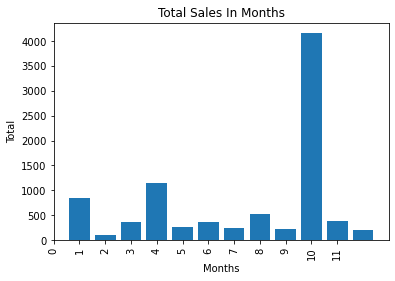

In [168]:
#sum of sales by months for france
plt.bar(France['Month'],France['Total'])
plt.xticks(range(0,12),rotation='vertical')
plt.xlabel('Months')
plt.ylabel('Total')
plt.title('Total overall Sales by Months')
plt.show()

In [170]:
#when do people buy 

hr= France.copy()
hr['Hour']=pd.DatetimeIndex(hr['InvoiceDate']).hour

In [172]:
hr=hr.groupby('Hour').sum().reset_index().sort_values('Hour')

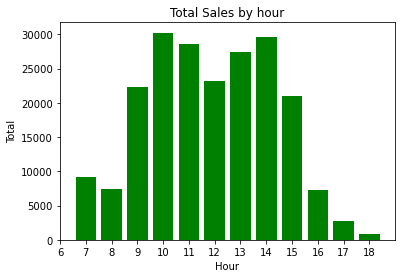

In [178]:
plt.bar(hr['Hour'],hr['Total'], color='green')
plt.xticks(range(6,19))
plt.xlabel('Hour')
plt.ylabel('Total')
plt.title('Total Sales by hour');

In [180]:
#which day sells the most

weekday=France.copy()
weekday['Weekday']= pd.DatetimeIndex(weekday['InvoiceDate']).weekday

In [186]:
weekday=weekday.groupby('Weekday').sum().reset_index()

In [187]:
weekday['Weekday'] = weekday['Weekday'].transform(lambda x: calendar.day_name[x])

TypeError: list indices must be integers or slices, not Series

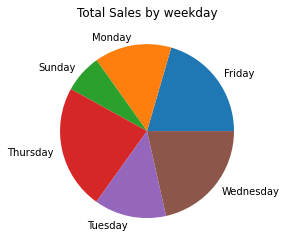

In [192]:
plt.pie(weekday['Total'],labels=weekday['Weekday'])
plt.title('Total Sales by weekday');

In [195]:
#top countries

Top_Countries= OR['Country'].value_counts().head(10)
Top_Countries

United Kingdom    487620
Germany             9042
France              8408
EIRE                7894
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1967
Portugal            1501
Australia           1185
Name: Country, dtype: int64

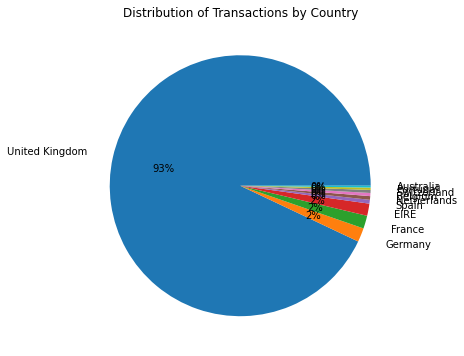

In [214]:
plt.figure(figsize=[6,6])
plt.pie(Top_Countries,labels=Top_Countries.index, autopct = '%0.0f%%',labeldistance=1.2)
plt.title("Distribution of Transactions by Country")
plt.show()